In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\yadny\\Downloads\\AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
data.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
###converting dtype object to datetime type.
from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
ts=data["#Passengers"]
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [7]:
ts[datetime(1949,2,1)]5

118

In [8]:
##to get data for a specific year.
ts['1960']

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [9]:
##to get the entire range by specifying the index in datetime format.
ts['1950-1-1':'1950-4-1']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
Name: #Passengers, dtype: int64

In [10]:
ts[:"1950-2-1"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
Name: #Passengers, dtype: int64

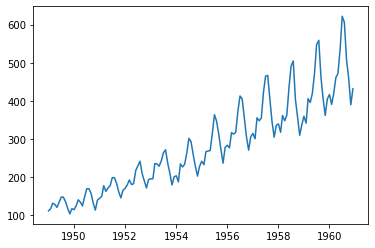

In [11]:
plt.plot(ts)

In [12]:
from statsmodels.tsa.stattools import adfuller 
dftest = adfuller(ts, autolag='AIC')
dftest

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =timeseries.rolling(12).mean()
    rolstd =timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

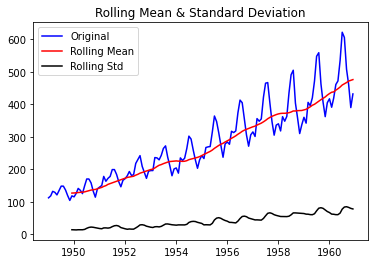

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
test_stationarity(ts)

In [15]:
ts_log=np.log(ts)

In [16]:
 ##(rolling_mean is also called rolling avg.)
moving_avg=ts_log.rolling(12).mean()
ts_log_moving_avg_diff=ts_log-moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [17]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

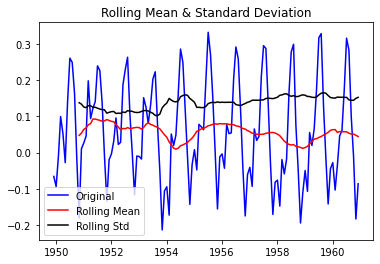

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [18]:
test_stationarity(ts_log_moving_avg_diff)

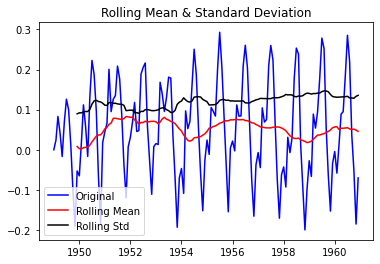

Results of Dickey-Fuller Test
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
##Exponential Weighted Average
expweighted_avg=ts_log.ewm(span=12).mean()
expweighted_avg_diff=ts_log-expweighted_avg
test_stationarity(expweighted_avg_diff)

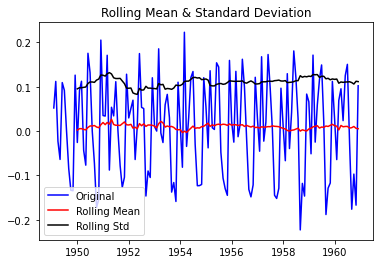

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [20]:
##  Differencing: by taking difference using time lag.
ts_log_diff=ts_log-ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

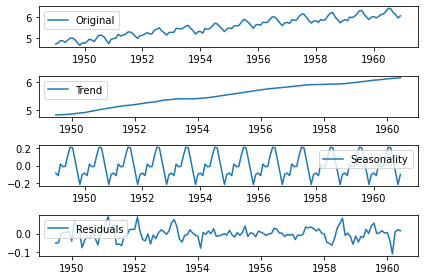

In [21]:
##Decomposition: model both trend and seasonality, then remove them
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose (ts_log)
trend =decomposition.trend 
seasonal =decomposition. seasonal
residual = decomposition.resid
plt.subplot (411)
plt.plot(ts_log, label='Original') 
plt. legend(loc= 'best') 
plt.subplot (412) 
plt.plot(trend, label='Trend')  
plt. legend (loc= 'best') 
plt.subplot (413)
plt.plot (seasonal, label='Seasonality')
plt. legend (loc= 'best')
plt.subplot (414)
plt.plot (residual, label='Residuals') 
plt. legend (loc= 'best')
plt.tight_layout ()

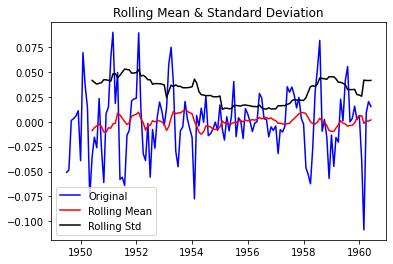

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [22]:
ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

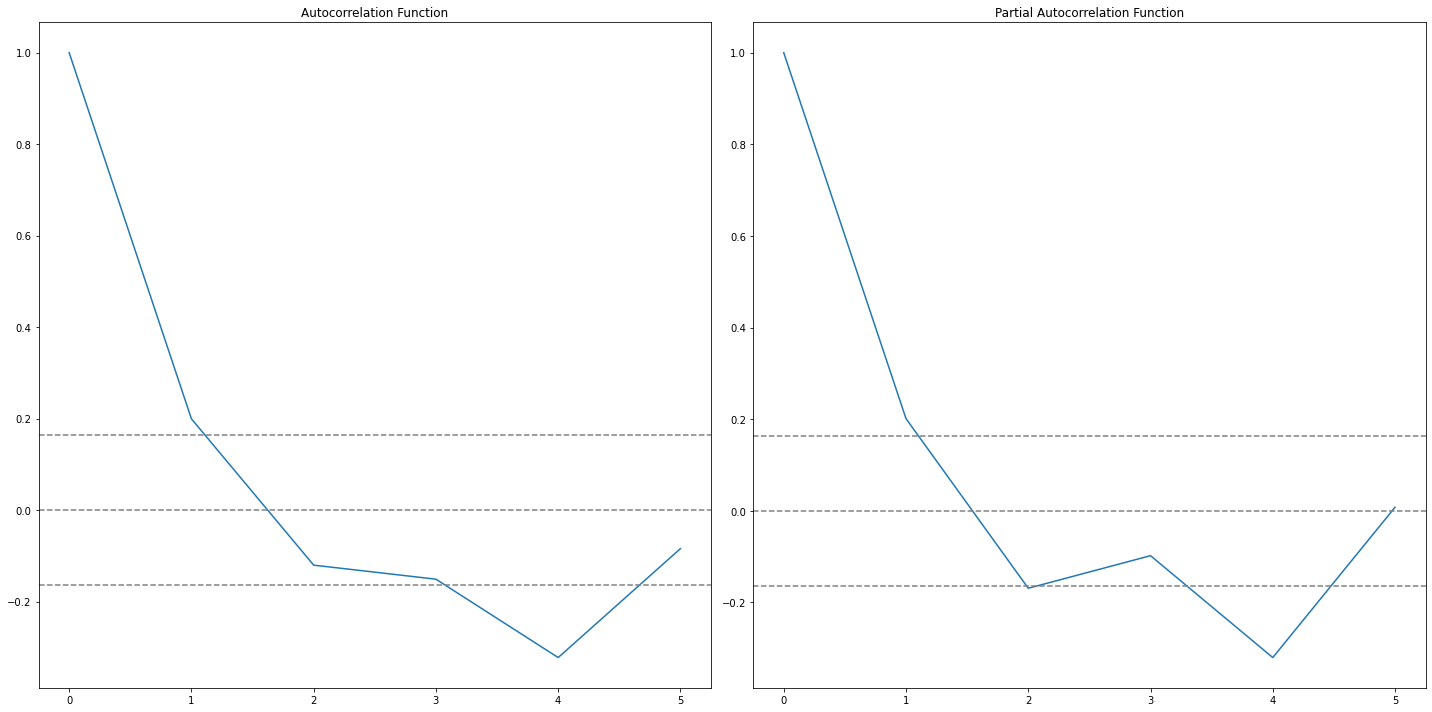

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(ts_log_diff,nlags=5)
lag_pacf=pacf(ts_log_diff,nlags=5)

plt.figure(figsize=(20,10))
##plot for acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

##plot for pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [24]:
! pip install pmdarima

C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Text(0.5, 1.0, 'RSS: nan')

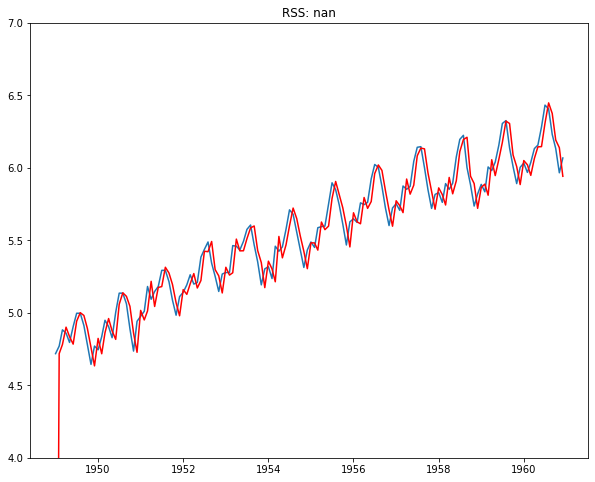

In [25]:
import statsmodels.api as smapi
smapi.tsa.arima.ARIMA(ts_log,order=(2,1,0))


#AR model
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit()
plt.figure(figsize=(10,8))
plt.ylim((4,7))
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

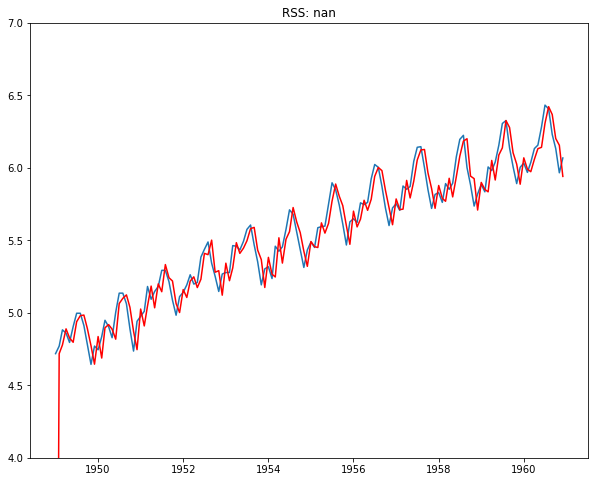

In [26]:
#MA model
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit()
plt.figure(figsize=(10,8))
plt.ylim((4,7))
plt.plot(ts_log)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yadny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

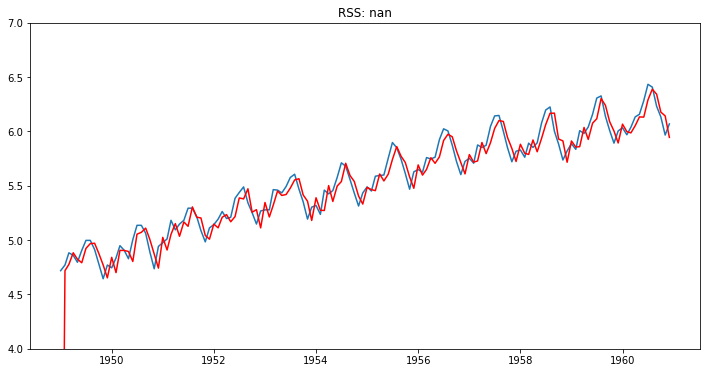

In [27]:
#ARIMA model
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.figure(figsize=(12,6))
plt.ylim((4,7))
plt.plot(ts_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

In [28]:
from pmdarima.arima import auto_arima

model=auto_arima(ts,start_p=1,start_q=1, test='adf', max_p=3,max_q=3, d=1,
                seasonal=True,trace=True, error_action='ignore', suppress_warnings=True,stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

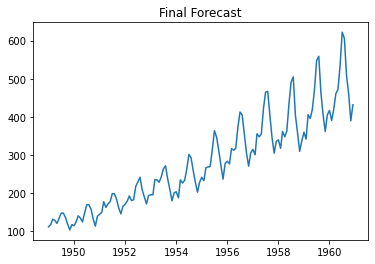

In [29]:
##*FORECAST
n=24
fc,confint=model.predict(n_periods=n,return_conf_int=True)
index_of_fc=np.arange(len(ts),len(ts)+n)
fc_series=pd.Series(fc,index=index_of_fc)
lower_series=pd.Series(confint[:,0],index=index_of_fc)
upper_series=pd.Series(confint[:,1],index=index_of_fc)

plt.plot(ts)
plt.plot(fc_series,color='green')
#plt.fill_between(lower_series.index,lower_series,upper_series,color=' green',alpha=0.5)
plt.title("Final Forecast")
plt.show()

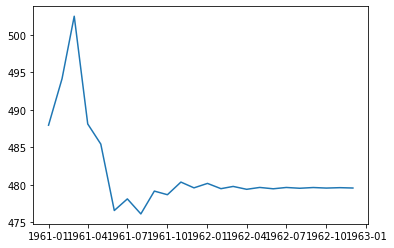

In [30]:
plt.plot(fc)

In [31]:
###Final Result..
##this the predicted passengers count##
fc

1961-01-01    487.932733
1961-02-01    494.134453
1961-03-01    502.467199
1961-04-01    488.099607
1961-05-01    485.414080
1961-06-01    476.553735
1961-07-01    478.102790
1961-08-01    476.100075
1961-09-01    479.144621
1961-10-01    478.661236
1961-11-01    480.347004
1961-12-01    479.576505
1962-01-01    480.169563
1962-02-01    479.467459
1962-03-01    479.767045
1962-04-01    479.382648
1962-05-01    479.631660
1962-06-01    479.451589
1962-07-01    479.627479
1962-08-01    479.521822
1962-09-01    479.620828
1962-10-01    479.547724
1962-11-01    479.601383
1962-12-01    479.554612
Freq: MS, dtype: float64